# Optimizacion
## Programacion Lineal
Problemas de optimización con función objetivo y restricciones de igualdad y desigualdad lineales.

## Problema del combustible

El problema de optimización consiste en maximizar las ganancias en un proceso de procesamiento de combustibles. 
* Una refinería tiene dos crudo de petróleos disponibles como material.
* Produce gasolina, queroseno y combustóleo.
* Ganancias del procesamiento del crudo #1 es 1 Euro/kg y del crudo #2 es 0.7 Euro/kg.
* Cuales son sus tasas optimas de alimentación diaria? 

A continuación se describe en una tabla los valores permitidos para cada crudo por dia.

| Producto  | Crudo #1 %  | Crudo #2 % | Max Permitido (kg/dia)  | Min Permitido (kg/dia)|
|---|---|---|---|---|
| Gasolina  | 70 | 31 | - | 6000 |
| Queroseno | 6 | 9 | 2400 | - |
| Combustelo | 24 | 60 | 12000 | - |

El problema se puede escribir como el siguiente problema de optimización:


$\begin{array}{ll} & \max _{x_{1}, x_{2}} x_{1}+0.7 x_{2} \\ \text { s.t. } & 0.7 x_{1}+0.31 x_{2} \geq 6000 \\ & 0.06 x_{1}+0.09 x_{2} \leq 2400 \\ & 0.24 x_{1}+0.6 x_{2} \leq 12000 \\ & x_{1}, x_{2} \geq 0\end{array}$

Observamos que el rango de la matriz es 3, la cantidad de filas/columnas linealmente independientes. Para realizar la grafica debemos saber en que rango de valores debemos movernos, para esto asumimos que pasa con la desigualdades cuando hacemos una de las variables cero.

$\begin{array}{ll}  x_{1} \geq 6000/0.7 = 26666.6 &  x_{2} \geq 6000/0.31 = 19354.84 \\  x_{1} \leq 2400/0.06 = 40000.0  &  x_{2} \leq 2400/0.09 =26666.66  \\  x_{1} \leq 12000/0.24 = 50000.0 & x_{2} \leq 12000/0.6 = 20000.0 \\ & x_{1}, x_{2} \geq 0\end{array}$

Ahora realizamos la grafica de la region donde las desigualdades estan definidas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.linspace(0,50000.0,500)
x2 = np.linspace(0,26666.66,500)
x1v, x2v = np.meshgrid(x1, x2)

In [3]:
#funciones para graficar lineas
linea1 = lambda x1: (6000.0 -0.7*x1)/0.31 #x2 <= (6000-0.7*x1)/0.31
linea2 = lambda x1: (2400.0 -0.06*x1)/0.09 
linea3 = lambda x1: (12000.0 -0.24*x1)/0.6

f = lambda x1,x2: -x1 - 0.7*x2

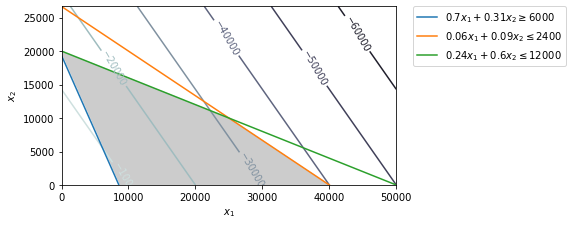

In [4]:
fig,ax=plt.subplots()
ax.cla()

ax.imshow( ( (x1v>=0.) & (x2v>=0.) & (x2v>=linea1(x1v)) & (x2v<=linea2(x1v)) & (x2v<=linea3(x1v)) ).astype(int), 
                extent=(x1v.min(),x1v.max(),x2v.min(),x2v.max()),origin="lower", cmap="Greys", alpha = 0.2);

CS = ax.contour(x1v, x2v, f(x1v,x2v), cmap=plt.cm.bone)
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(x1,linea1(x1),label=r'$0.7 x_{1}+0.31 x_{2} \geq 6000$')
ax.plot(x1,linea2(x1),label=r'$0.06 x_{1}+0.09 x_{2} \leq 2400$')
ax.plot(x1,linea3(x1),label=r'$0.24 x_{1}+0.6 x_{2} \leq 12000$')
ax.set_xlim([0,50000])
ax.set_ylim([0,26666.66])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

## Transformación a forma estandar
Lo debemos llevar a la forma estandar, la cual esta dada por:
$$
\begin{array}{r}\min _{\boldsymbol{x}} \boldsymbol{d}^{\top} \bar{\boldsymbol{x}} \\ \text { s.t. } \boldsymbol{A} \bar{\boldsymbol{x}}=\boldsymbol{b} \\ \bar{\boldsymbol{x}} \geq \mathbf{0}\end{array}
$$

Comenzamos cambiando la función objetivo de maximización a minimización ($-f(\mathbf{x})$).
Para volver las condiciones de desigualdad del problema original a condiciones de igualdad en la forma estandar, debemos agregar 3 variables de olgura asi:


$\begin{array}{ll} & \min _{x_{1}, x_{2}} -x_{1}-0.7 x_{2} \\ \text { s.t. } & 0.7 x_{1}+0.31 x_{2} - v_1 = 6000 \\ & 0.06 x_{1}+0.09 x_{2} + v_2 = 2400 \\ & 0.24 x_{1}+0.6 x_{2} + v_3 = 12000 \\ & x_{1}, x_{2}, v_1,v_2,v_3 \geq 0\end{array}$

donde $\bar{\boldsymbol{x}} = [x_{1}, x_{2}, v_1,v_2,v_3]^{\top}$ y $\mathbf{d} = [-1,-0.7,0,0,0]^{\top}$, $\mathbf{b} = [6000,2400,12000]^{\top}$ y 
$$ \mathbf{A} = \begin{bmatrix} 0.7 & 0.31 & -1 & 0 & 0 \\ 0.06 & 0.09 & 0 & 1 & 0 \\ 0.24 & 0.6 & 0 & 0 & 1 \end{bmatrix} $$

In [5]:
import numpy as np

In [6]:
d = np.array([-1,-0.7,0,0,0]).reshape(-1,1)
b = np.array([[6000],[2400],[12000]])
A = np.array([[0.7,0.31,-1,0,0],[0.06,0.09,0,1,0],[0.24,0.6,0,0,1]])
rango = np.linalg.matrix_rank(A)
print("El rango de la matriz es: ",rango)

El rango de la matriz es:  3


## Metodo Simplex

Ahora verificamos el pseudo-codigo de la presentación:
<br>
<br>
While not($\lambda_{I,N} \geq \mathbf 0$)
1. Seleccionar el indice $q \notin T^k(\mathbf x)$ tal que 
$$q = \underset{i \notin T^k(\mathbf x)}{\operatorname{argmin}}\mathbf \lambda_{I,i}$$
<br>

Considerando el conjunto de  indices $T(\mathbf{x})=\{2,3,4\}$  (en Pytho sería {1,2,3}). Construimos la matriz $\mathbf{B}$ y $\mathbf{N}$, así
$$ \mathbf{B} = \begin{bmatrix} 0.31 & -1 & 0\\ 0.09 & 0 & 1\\ 0.6 & 0 & 0  \end{bmatrix}, \quad  \mathbf{N} = \begin{bmatrix} 0.7 & 0\\ 0.06 & 0\\ 0.24 & 1  \end{bmatrix}$$ 
Calculamos las siguientes condiciones KKT:
$$ \boldsymbol{\lambda}_E = [\mathbf{B}^{\top}]^{-1} \mathbf{d}_B $$
$$ \boldsymbol{\lambda}_{I,N} = \mathbf{d}_N - \mathbf{N}^{\top} \boldsymbol{\lambda}_E $$
$$ \mathbf{x}_B = \mathbf{B}^{-1}\mathbf{b}  $$
Las condiciones KKT se satisfacen sí $\mathbf{x}_B \geq \mathbf{0}$ y  $\boldsymbol{\lambda}_{I,N} \geq \mathbf{0}$.

In [7]:
T = [1,2,3]
noT = [0,4]
B = A[:,T]
N = A[:,noT]

#Calculos solicitados
lam_E = np.linalg.solve(B.T,d[T]) #[B.T]^{-1}@d_B
lam_IN = d[noT] - N.T@lam_E #lambda_{IN} = d_N - N.T@lambda_E
x_B = np.linalg.solve(B,b) #x_B = B^{-1}@lambda_E
print("Lambda_E = ", lam_E)
print("Lambda_IN = ", lam_IN)
print("El vector x_B es: ",x_B)
barx = np.zeros((d.size,1))
barx[T] = x_B
print(f"La funcion objetivo evaluada en x_B es: ",d.T@barx)

Lambda_E =  [[-0.        ]
 [ 0.        ]
 [-1.16666667]]
Lambda_IN =  [[-0.72      ]
 [ 1.16666667]]
El vector x_B es:  [[20000.]
 [  200.]
 [  600.]]
La funcion objetivo evaluada en x_B es:  [[-14000.]]


Observamos que $\boldsymbol{\lambda}_{I,N}$ no cumple con la condición, debido que uno de los $\boldsymbol{\lambda}_{I,N}$ es menor que cero. Continuamos con el siguiente paso del algoritmo:

2. Incrementar $x_q$, siguiendo $\mathbf A \mathbf x^+ = \mathbf b$, hasta que algun $x_p^+$ con $p \in T(\mathbf x)$ se vuelva cero. <br>
<br>
$$\implies x_q^+ = \underset{i \in T^k(\mathbf x)|(\mathbf B^{-1} \mathbf A_q)_i \gt 0}{\operatorname{min}} (\mathbf x_B)_i/(\mathbf B^{-1} \mathbf A_q)_i$$
<br>
$$\implies p = \underset{i \in T^k(\mathbf x)|(\mathbf B^{-1} \mathbf A_q)_i \gt 0}{\operatorname{argmin}} (\mathbf x_B)_i/(\mathbf B^{-1} \mathbf A_q)_i$$
<br>



Incluimos la columna correspondiente al valor más negativo de $\boldsymbol{\lambda}_{I,N}$ en la matriz $\mathbf{B}$ (Regla de Dantzig). Sea $\mathbf A_q$ la correspondiente columna de $\mathbf A$.  Para determinar la columna que tenemos que eliminar de $\mathbf B$, usamos la siguiente ecuación

$$\mathbf x_B^{+} = \mathbf x_B - \mathbf B^{-1} \mathbf A_q x_q^+$$
<br>
Aqui, $x_q$ deberia ser incrementada desde cero. El vector $\mathbf x_B^{+}$, 
cuya componente sea cero, es exactamente la columna en $\mathbf B$, que debe ser eliminada.



In [8]:
q = np.argmin(lam_IN)
x_q = 0.0
x_Bp = x_B - np.linalg.solve(B,x_q*A[:,q].reshape(-1,1))
while (np.all(x_Bp != np.zeros_like(x_B))):
  x_q += 1e3
  x_Bp = x_B - np.linalg.solve(B,x_q*A[:,q].reshape(-1,1))
print("El valor de x_q es:", x_q)
print("x_Bp:", x_Bp)
p = np.argwhere(x_Bp == np.zeros_like(x_B))[0][0]

El valor de x_q es: 25000.0
x_Bp: [[10000.]
 [14600.]
 [    0.]]


Observamos que se hace cero la tercera componente de $\mathbf x_B^{+}$. La eliminamos y agregamos $q$. Y volvemos a realizar todos los pasos anteriores.

In [9]:
qreal = noT[q]
noT[q] = T[p]
T[p] = qreal
print(T)
print(noT)

[1, 2, 0]
[3, 4]


In [10]:
B = A[:,T]
N = A[:,noT]

#Calculos solicitados
lam_E = np.linalg.solve(B.T,d[T])
lam_IN = d[noT] - N.T@lam_E
x_B = np.linalg.solve(B,b)
print("Lambda_E = ", lam_E)
print("Lambda_IN = ", lam_IN)
print("El vector x_B es: ",x_B)
barx = np.zeros((d.size,1))
barx[T] = x_B
print(f"La funcion objetivo evaluada en x_B es: ",d.T@barx)

Lambda_E =  [[ -0.        ]
 [-30.        ]
 [  3.33333333]]
Lambda_IN =  [[30.        ]
 [-3.33333333]]
El vector x_B es:  [[10000.]
 [14600.]
 [25000.]]
La funcion objetivo evaluada en x_B es:  [[-32000.]]


Otro $\boldsymbol{\lambda}_{IN}$ negativo.

In [11]:
q = np.argmin(lam_IN)
x_q = 0.0
x_Bp = x_B - np.linalg.solve(B,x_q*A[:,q].reshape(-1,1))
while (np.all(x_Bp != np.zeros_like(x_B))):
  x_q += 1e3
  x_Bp = x_B - np.linalg.solve(B,x_q*A[:,q].reshape(-1,1))
print("El valor de x_q es:", x_q)
print("x_Bp:", x_Bp)
p = np.argwhere(x_Bp == np.zeros_like(x_B))[0][0]

El valor de x_q es: 10000.0
x_Bp: [[    0.]
 [14600.]
 [25000.]]


In [12]:
qreal = noT[q]
noT[q] = T[p]
T[p] = qreal
print(T)
print(noT)

[4, 2, 0]
[3, 1]


In [13]:
B = A[:,T]
N = A[:,noT]

#Calculos solicitados
lam_E = np.linalg.solve(B.T,d[T])
lam_IN = d[noT] - N.T@lam_E
x_B = np.linalg.solve(B,b)
print("Lambda_E = ", lam_E)
print("Lambda_IN = ", lam_IN)
print("El vector x_B es: ",x_B)
barx = np.zeros((d.size,1))
barx[T] = x_B
print(f"La funcion objetivo evaluada en x_B es: ",d.T@barx)

Lambda_E =  [[ -0.        ]
 [-16.66666667]
 [  0.        ]]
Lambda_IN =  [[16.66666667]
 [ 0.8       ]]
El vector x_B es:  [[ 2400.]
 [22000.]
 [40000.]]
La funcion objetivo evaluada en x_B es:  [[-40000.]]


Ningun $\boldsymbol{\lambda}_{IN}$ es negativo. LLegamos a la solución del problema. La cual es:

In [15]:
print(f"x{T[0]}={x_B[0]},x{T[1]}={x_B[1]},x{T[2]}={x_B[2]},x{noT[0]}=0.0,x{noT[1]}=0.0")

x4=[2400.],x2=[22000.],x0=[40000.],x3=0.0,x1=0.0


## Problema 2: 
$\begin{array}{ll} & \max 4x+3y \\ \text { s.t. } & x \geq 0 \\ & y \geq 2 \\ & 2y\leq 25–x \\ & 4y\geq 2x–8 \\ & y\leq 2x−5 \end{array}$

Solucionar el problema anterior usando https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html.